# Pandas 

`Pandas` : library untuk analisis dan manipulasi data, dibangun di atas library Numpy sehingga kelebihannya memiliki komputasi yang cepat.

`Dataframe` : data dua dimensi yang terlabeli dengan kolom yang memiliki tipe data berbeda. Pada python kita dapat menggunakan modul pandas untuk mengakses, membuat, dan melakukan operasi pada data. 

`Series` : Merupakan struktur data dasar dalam Pandas. Series bisa juga diibaratkan sebagai array satu dimensi seperti halnya yang ada pada numpy array, hanya bedanya mempunyai index dan kita dapat mengontrol index dari setiap elemen tersebut.

Struktur data yang bisa ditampung berupa `integer`,`float`, dan juga `string`.  

In [6]:
# import library
import pandas as pd, numpy as np
print(pd.__version__)

1.3.5


## Membuat Dataframe

Untuk membuat dataframe melalui pandas dapat dilakukan dengan cara berikut:
1. Menggunakan dictionary
2. Menggunakan array

In [7]:
# Membuat dataframe menggunakan dictionary {'key':[value]}
pd.DataFrame({"Apel" : [35, 42],
              "Pisang" : [21, 35]})

,Apel,Pisang
0,35,21
1,42,35


Terlihat pada code di atas, dataframe dictionary dengan key sebagai nama kolom dan value dari key sebagai nilai tiap kolom. 

In [5]:
# Kita juga dapat mendefinisikan indeks melalui opsi 'index' di mana dalam hal ini Januari dan Februari sebagai indeks
pd.DataFrame({"Apel" : [35, 42],
              "Pisang" : [21, 35]}, index = ['Jan', 'Feb'])

,Apel,Pisang
Jan,35,21
Feb,42,35


In [8]:
# Membuat dataframe menggunakan array
pd.DataFrame(np.array([[35, 42], 
                              [21, 35]]),
            columns=["Apel", "Pisang"])


,Apel,Pisang
0,35,42
1,21,35


### Input Data
Pandas dapat membaca file dengan format `csv`, `json`, `xlsx`, `txt` sebagai `DataFrame`.  

Dengan `pd.read_csv('filepath')` dan memasukkan lokasi file csv yang akan dibaca.

In [9]:
data_profile = pd.read_csv('/content/data_profil.csv')

Terkhusus google collab bisa dilihat di https://buomsoo-kim.github.io/colab/2020/05/09/Colab-mounting-google-drive.md/ :
1. Pastikan anda telah login ke akun google anda dan data csv ada dalam drive google akun anda, jika belum boleh diupload terlebih dahulu atau jika di beberapa shared drive dengan orang lain dapat dilakukan dengan klik kanan pada file data yang ingin di masukkan lalu klik Make a copy
2. Jalankan
   <br>`from google.colab import drive`
   <br>`drive.mount("/content/drive")`
   <br>Nanti akan diminta kode authorisasi untuk memount data dan juga tersedia alamat yang menyediakan kode authorisasi tersebut
   <br>Masukkan lalu klik enter
3. Pada bagian sebelah kiri klik ikon folder 
4. Cari file csv yang ingin dimasukkan klik kanan klik Copy path 
5. Paste file path csv tadi ke kode `pd.read_csv`

In [10]:
data_profile.head()

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


In [11]:
data_profile.tail()

,id,jenis_kelamin,divisi,umur
95,96,Perempuan,Customer Service,23
96,97,Laki-laki,Software Engineer,32
97,98,Perempuan,Business Intelligence,28
98,99,Perempuan,Software Engineer,25
99,100,Perempuan,Software Engineer,29


In [12]:
data_profile.shape

(100, 4)

In [14]:
data_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             100 non-null    int64 
 1   jenis_kelamin  100 non-null    object
 2   divisi         100 non-null    object
 3   umur           100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [15]:
data_profile["divisi"]

0          Customer Service
1             Data Engineer
2         Software Engineer
3     Business Intelligence
4         Software Engineer
              ...          
95         Customer Service
96        Software Engineer
97    Business Intelligence
98        Software Engineer
99        Software Engineer
Name: divisi, Length: 100, dtype: object

In [16]:
type(data_profile["divisi"])

pandas.core.series.Series

Di sini kita bisa lihat jika mengambil sebuah kolom dari dataframe maka tipe datanya berupa series.

## Index-based selection

Jika kita ingin mengambil/memilih data berdasarkan indeks kita dapat melakukannya dengan `iloc` dengan input `[baris, kolom]`

In [17]:
data_profile.iloc[1]

id                           2
jenis_kelamin        Laki-laki
divisi           Data Engineer
umur                        26
Name: 1, dtype: object

In [18]:
# ambil kolom
data_profile.iloc[:, 2]

0          Customer Service
1             Data Engineer
2         Software Engineer
3     Business Intelligence
4         Software Engineer
              ...          
95         Customer Service
96        Software Engineer
97    Business Intelligence
98        Software Engineer
99        Software Engineer
Name: divisi, Length: 100, dtype: object

## label-based selection

Jika kita ingin mengambil/memilih data berdasarkan nama kolom kita dapat melakukannya dengan `loc` dengan input `[baris, nama kolom]`

In [19]:
data_profile.loc[4, "divisi"]

'Software Engineer'

In [20]:
data_profile.loc[:, "divisi"]

0          Customer Service
1             Data Engineer
2         Software Engineer
3     Business Intelligence
4         Software Engineer
              ...          
95         Customer Service
96        Software Engineer
97    Business Intelligence
98        Software Engineer
99        Software Engineer
Name: divisi, Length: 100, dtype: object

## Index dengan kondisi

Pengambilan data dengan kondisi dapat dilakukan dengan 'dataframe[kondisi]'

In [21]:
# Kondisi di mana pengambilan akan dilakukan pada divisi data science
data_profile.divisi == "Data Science"

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: divisi, Length: 100, dtype: bool

In [22]:
z = data_profile.divisi == "Data Science"

In [23]:
data_profile.divisi[z]

9     Data Science
26    Data Science
33    Data Science
34    Data Science
49    Data Science
60    Data Science
72    Data Science
79    Data Science
80    Data Science
92    Data Science
Name: divisi, dtype: object

In [24]:
# ambil pake loc, outputnya tabel
data_profile.loc[data_profile.divisi == "Data Engineer"]

,id,jenis_kelamin,divisi,umur
1,2,Laki-laki,Data Engineer,26
12,13,Laki-laki,Data Engineer,25
13,14,Laki-laki,Data Engineer,25
14,15,Laki-laki,Data Engineer,33
24,25,Perempuan,Data Engineer,32
35,36,Laki-laki,Data Engineer,23
39,40,Perempuan,Data Engineer,24
44,45,Laki-laki,Data Engineer,35
66,67,Laki-laki,Data Engineer,28
67,68,Laki-laki,Data Engineer,33


In [25]:
# 2 kondisi yaitu data engineer dan umurnya 33
data_profile.loc[(data_profile.divisi == "Data Engineer") &
                 (data_profile.umur == 33)]

,id,jenis_kelamin,divisi,umur
14,15,Laki-laki,Data Engineer,33
67,68,Laki-laki,Data Engineer,33


In [26]:
data_profile.loc[(data_profile.divisi == "Data Engineer") |
                 (data_profile.umur == 33)]

,id,jenis_kelamin,divisi,umur
1,2,Laki-laki,Data Engineer,26
12,13,Laki-laki,Data Engineer,25
13,14,Laki-laki,Data Engineer,25
14,15,Laki-laki,Data Engineer,33
15,16,Perempuan,Software Engineer,33
24,25,Perempuan,Data Engineer,32
35,36,Laki-laki,Data Engineer,23
39,40,Perempuan,Data Engineer,24
44,45,Laki-laki,Data Engineer,35
60,61,Perempuan,Data Science,33


In [27]:
# menggunakan isin untuk mengambil data dengan kondisi termasuk dalam kumpulan data tertentu.
data_profile.loc[data_profile.umur.isin([25, 30])]

,id,jenis_kelamin,divisi,umur
10,11,Perempuan,Marketing,25
12,13,Laki-laki,Data Engineer,25
13,14,Laki-laki,Data Engineer,25
20,21,Laki-laki,Software Engineer,30
29,30,Laki-laki,Software Engineer,25
31,32,Laki-laki,Software Engineer,30
41,42,Laki-laki,Software Engineer,25
45,46,Laki-laki,Marketing,25
51,52,Laki-laki,Business Intelligence,25
78,79,Perempuan,Data Engineer,25


## summary

In [28]:
# describe
data_profile.describe()

,id,umur
count,100.000000,100.000000
mean,50.500000,27.660000
std,29.011492,4.346646
min,1.000000,21.000000
25%,25.750000,24.000000
50%,50.500000,27.000000
75%,75.250000,32.000000
max,100.000000,35.000000


In [32]:
data_profile.describe(include = 'O')

,jenis_kelamin,divisi
count,100,100
unique,2,6
top,Laki-laki,Software Engineer
freq,68,31


In [33]:
data_profile.describe(include = 'all')

,id,jenis_kelamin,divisi,umur
count,100.000000,100,100,100.000000
unique,NaN,2,6,NaN
top,NaN,Laki-laki,Software Engineer,NaN
freq,NaN,68,31,NaN
mean,50.500000,NaN,NaN,27.660000
std,29.011492,NaN,NaN,4.346646
min,1.000000,NaN,NaN,21.000000
25%,25.750000,NaN,NaN,24.000000
50%,50.500000,NaN,NaN,27.000000
75%,75.250000,NaN,NaN,32.000000


In [34]:
data_profile.umur.describe()

count    100.000000
mean      27.660000
std        4.346646
min       21.000000
25%       24.000000
50%       27.000000
75%       32.000000
max       35.000000
Name: umur, dtype: float64

In [35]:
# ada divisi apaan aja
data_profile.divisi.unique()

array(['Customer Service', 'Data Engineer', 'Software Engineer',
       'Business Intelligence', 'Data Science', 'Marketing'], dtype=object)

In [36]:
# tiap divisi ada berapa orang
data_profile.divisi.value_counts()

Software Engineer        31
Business Intelligence    21
Customer Service         15
Data Engineer            14
Data Science             10
Marketing                 9
Name: divisi, dtype: int64

## Grouping

In [37]:
# mau tau umur paling muda dari tiap divisi
data_profile.groupby("divisi").umur.min()

divisi
Business Intelligence    21
Customer Service         22
Data Engineer            23
Data Science             21
Marketing                24
Software Engineer        21
Name: umur, dtype: int64

In [38]:
# mau tau umur paling muda dan tua
data_profile.groupby("divisi").umur.agg([min,max])

,min,max
divisi,,
Business Intelligence,21,35
Customer Service,22,35
Data Engineer,23,35
Data Science,21,35
Marketing,24,35
Software Engineer,21,34


In [39]:
# mau tau jumlah laki2 dan perempuan di tiap divisi
data_profile.groupby(["divisi","jenis_kelamin"]).umur.agg([len,])

len
divisi                jenis_kelamin     
Business Intelligence Laki-laki       16
                      Perempuan        5
Customer Service      Laki-laki       12
                      Perempuan        3
Data Engineer         Laki-laki       11
                      Perempuan        3
Data Science          Laki-laki        4
                      Perempuan        6
Marketing             Laki-laki        4
                      Perempuan        5
Software Engineer     Laki-laki       21
                      Perempuan       10

## sorting

In [40]:
# urutin dari umur paling muda
data_profile.sort_values(by="umur")

,id,jenis_kelamin,divisi,umur
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21
6,7,Perempuan,Software Engineer,21
9,10,Laki-laki,Data Science,21
8,9,Perempuan,Business Intelligence,21
...,...,...,...,...
50,51,Laki-laki,Marketing,35
44,45,Laki-laki,Data Engineer,35
38,39,Laki-laki,Business Intelligence,35
21,22,Laki-laki,Customer Service,35


In [41]:
# urutin dari umur paling tua
data_profile.sort_values(by="umur", ascending=False)

,id,jenis_kelamin,divisi,umur
50,51,Laki-laki,Marketing,35
21,22,Laki-laki,Customer Service,35
49,50,Laki-laki,Data Science,35
44,45,Laki-laki,Data Engineer,35
38,39,Laki-laki,Business Intelligence,35
...,...,...,...,...
9,10,Laki-laki,Data Science,21
6,7,Perempuan,Software Engineer,21
8,9,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


## cek data kosong

In [42]:
# cek ada data yang kosong gak ditiap variabel
data_profile.isnull().sum()

id               0
jenis_kelamin    0
divisi           0
umur             0
dtype: int64

## Menggabungkan dua dataframe

*   Menggunakan `merge` function
*   Menggunakan `concat` function



In [43]:
x_1=pd.DataFrame({'id':[i for i in range(5)],'axe':[i*5 for i in range(1,6)]})
x_2=pd.DataFrame({'id':[i for i in range(7)],'axe':[i*4 for i in range(1,8)]})

In [44]:
x_1

,id,axe
0,0,5
1,1,10
2,2,15
3,3,20
4,4,25


In [45]:
x_2

,id,axe
0,0,4
1,1,8
2,2,12
3,3,16
4,4,20
5,5,24
6,6,28


In [46]:
x_1.merge(x_2, on='id', how='left')

,id,axe_x,axe_y
0,0,5,4
1,1,10,8
2,2,15,12
3,3,20,16
4,4,25,20


Penggabungan dua dataframe bisa menggunakan code di atas, di mana melalui opsi yang diberikan di atas "on = id" menandakan penggabungan dilakukan berdasarkan id sedangkan " how = 'right' " menandakan cara irisan key yang dilakukan sebagai dasar penggabungan. Irisan pada opsi how didasarkan pada konsep irisan sama dengan SQL
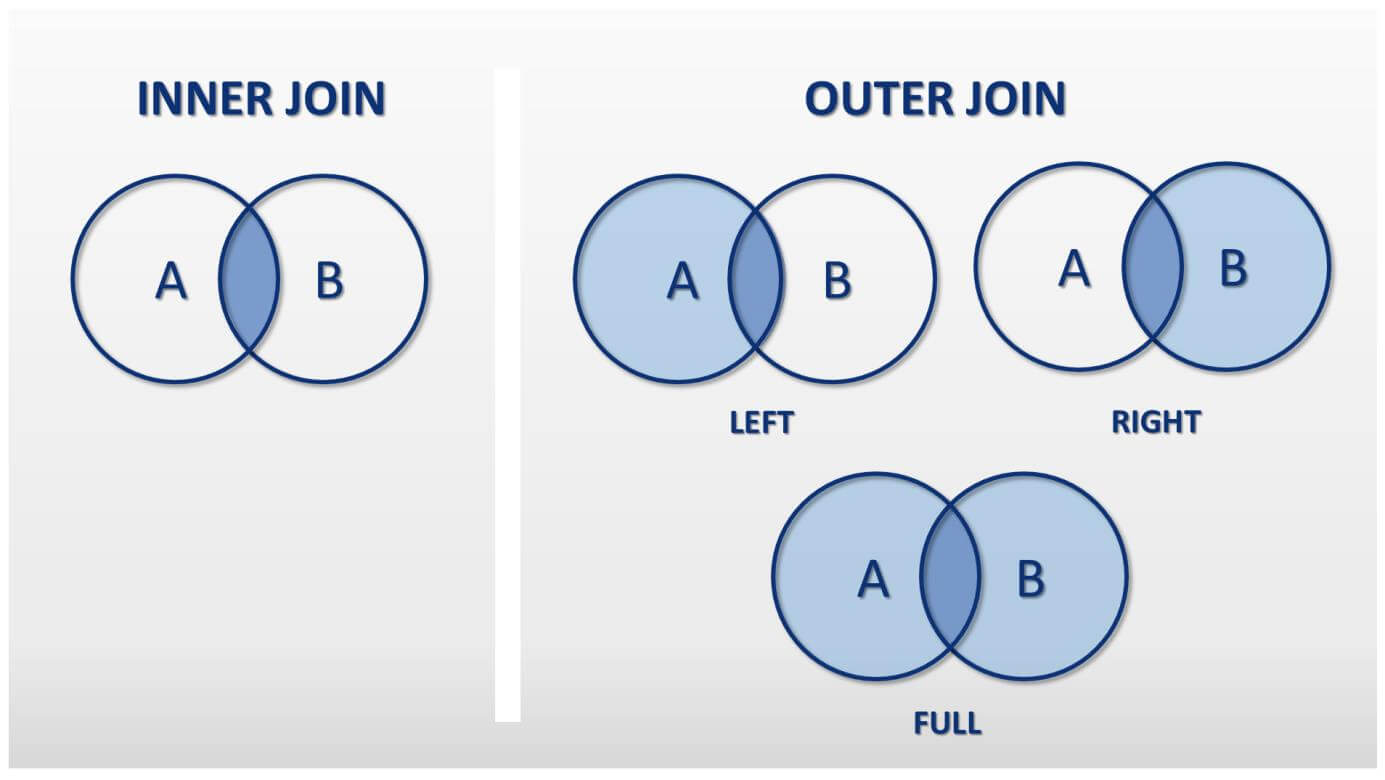


In [ ]:
x_1.merge(x_2, on='id', how='right')

,id,axe_x,axe_y
0,0,5.0,4
1,1,10.0,8
2,2,15.0,12
3,3,20.0,16
4,4,25.0,20
5,5,NaN,24
6,6,NaN,28


In [51]:
pd.concat([x_1, x_2], ignore_index = True)

,id,axe
0,0,5
1,1,10
2,2,15
3,3,20
4,4,25
5,0,4
6,1,8
7,2,12
8,3,16
9,4,20
